# August 2025 TripleTen Code Pudding

## Team 2 

We've been tasked with training a neural network on Spotify data to try to predict its popularity rating.

In [55]:
# EDA
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Neural network tools
import torch

In [26]:
df = pd.read_csv('data/SpotifyFeatures.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [28]:
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# Preprocessing

Checking for missing/duplicate values.

In [29]:
df['track_id'].duplicated().value_counts()

track_id
False    176774
True      55951
Name: count, dtype: int64

In [30]:
df_duplicates = df[df['track_id'].duplicated() == True].index
df.drop(df_duplicates, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             176774 non-null  object 
 1   artist_name       176774 non-null  object 
 2   track_name        176773 non-null  object 
 3   track_id          176774 non-null  object 
 4   popularity        176774 non-null  int64  
 5   acousticness      176774 non-null  float64
 6   danceability      176774 non-null  float64
 7   duration_ms       176774 non-null  int64  
 8   energy            176774 non-null  float64
 9   instrumentalness  176774 non-null  float64
 10  key               176774 non-null  object 
 11  liveness          176774 non-null  float64
 12  loudness          176774 non-null  float64
 13  mode              176774 non-null  object 
 14  speechiness       176774 non-null  float64
 15  tempo             176774 non-null  float64
 16  time_signature    176774 

We know there's a missing track name, so let's look into that.

In [31]:
df['track_name'].isna().value_counts()

track_name
False    176773
True          1
Name: count, dtype: int64

In [32]:
df[df['track_name'].isna() == True]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
208285,World,Elevation Worship,NaN,7BGQCe62A58Q5ZgpQFX93t,44,0.019,0.287,350027,0.446,0.0,F,0.1,-7.214,Major,0.0317,138.727,4/4,0.0387


Presumably the track name is not literally "NaN." A correlation between track name and popularity doesn't make much sense (maybe very long names are unmarketable and less popular for that reason?), so let's not worry about it.

# Investigation and EDA

So what's in this dataset, anyway?

In [33]:
df['genre'].value_counts()

genre
Comedy              9674
Electronic          9149
Alternative         9095
Anime               8935
Classical           8711
Reggae              8687
Reggaeton           8549
Blues               8496
Soundtrack          8480
Opera               8280
Folk                8048
Jazz                8039
Ska                 8017
Dance               7982
World               7973
Movie               7802
Hip-Hop             7413
Country             7383
Children's Music    5402
R&B                 5353
Soul                4430
Indie               3318
Pop                 2417
Rock                2227
Rap                 1456
Children’s Music    1339
A Capella            119
Name: count, dtype: int64

The project is specifically about "song" popularity. It's unclear that the data for "Movie" tracks counts, as those might be full-on movies (presumably soundtracks would be under "Soundtrack" instead). Let's leave it be for now.

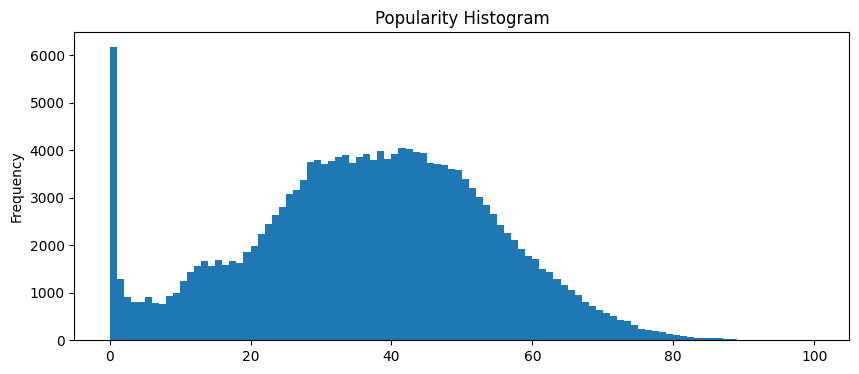

In [34]:
df['popularity'].plot(title='Popularity Histogram', kind='hist', bins=100, figsize=(10, 4))
plt.show()

There are a lot of songs with 0-ish popularity. Going by the histogram, you'd expect at most 1500ish, but there are over 6000! Zero popularity is apparently the most common. Is this evidence of missing data?

In [35]:
df[df['popularity'] == 0]['genre'].value_counts()

genre
Children's Music    2966
Movie               1733
Classical            892
Dance                109
Opera                 92
Country               63
Jazz                  60
Blues                 55
Electronic            53
Reggae                44
Anime                 36
Soul                  16
A Capella             10
Children’s Music       9
Comedy                 8
Alternative            7
Folk                   6
R&B                    6
Soundtrack             3
Rock                   1
Reggaeton              1
Name: count, dtype: int64

These entries are highly concentrated in three genres: children's music, "movie", and classical music. What genres appear most on the highly-populated end?

In [36]:
df[df['popularity'] > 80]['genre'].value_counts()

genre
Dance               146
Hip-Hop             116
Pop                 107
Rap                  62
Reggaeton            25
Rock                 17
Indie                 4
Folk                  4
Children’s Music      3
Alternative           2
Soul                  2
Electronic            1
Movie                 1
Country               1
Name: count, dtype: int64

Looks like pop, rap, dance, and hip-hop are popular with Spotify users, or at least in this subset of tracks. 

Spotify's API documentation has this to say about popularity:

> The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note: the popularity value may lag actual popularity by a few days: the value is not updated in real time.

It stands to reason that there are likely many tracks on Spotify that don't get played often. Without further transparency about how their algorithm works, there's no particular reason to believe the outlier is indicative of missing data, aside from being an outlier itself. So we'll leave it untouched.

In [37]:
df[['key', 'mode']].value_counts()

key  mode 
C    Major    16740
G    Major    15625
D    Major    14249
C#   Major    11939
A    Major    10718
F    Major     9365
G#   Major     8449
B    Minor     6867
E    Major     6791
A    Minor     6781
E    Minor     6617
A#   Major     6434
F    Minor     6240
F#   Major     6132
B    Major     6026
A#   Minor     5490
F#   Minor     5233
C#   Minor     4917
G    Minor     4851
D    Minor     4394
C    Minor     4230
D#   Major     4151
G#   Minor     2726
D#   Minor     1809
Name: count, dtype: int64

It strikes me as unlikely that musical key correlates to popularity (and it's likely ambiguous for some kinds of music anyway). But it is interesting to see how lopsided the representation is among Spotify's data. Our top 7 keys are all major keys, for starters.

C major being common is unsurprising. It's the simplest major key from a theory perspective: no sharps, no flats. This would make it a very reasonable default to write in for keyboard-based instruments like pianos and synthesizers. 

G, D, and A make a lot of sense through the lens of guitar, which is also a very common instrument in popular genres.

Three typical beginner guitar chords are G-C-D, corresponding to I-IV-V in G major. A guitarist that also knows the A major chord can then play D-G-A, which is the same chord progression in D major. Add the E chord, and you can get that progression in A major, using A-D-E.

I am unsure how to explain the commonness of C#/Db major. 

<Axes: title={'center': 'Time Signatures in Spotify Song Data'}, xlabel='time_signature'>

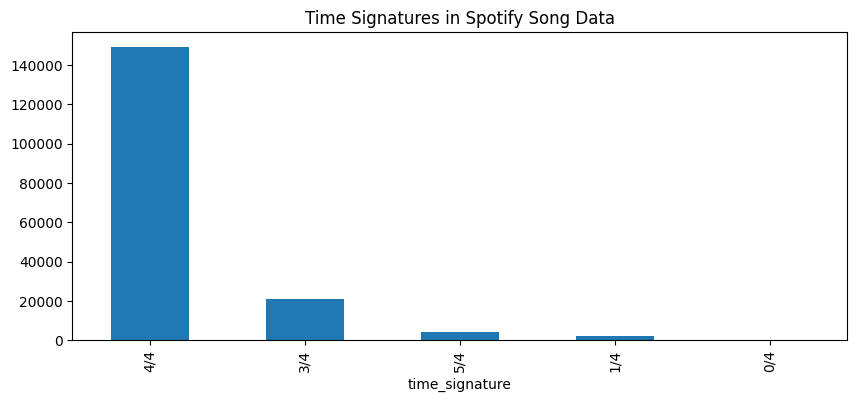

In [38]:
df['time_signature'].value_counts().plot(title='Time Signatures in Spotify Song Data', 
                                         kind='bar', figsize=(10, 4))

The time signature data is also unsurprising. To explain to non-musicians, 4/4 represents music where every fourth beat is emphasized--the classic rock hit *Carry On Wayward Son* by Kansas is an example. If you can count "one, two, three, four" along to the music and have it line up, it's probably 4/4. A lot of dance music is in 4/4, because humans have two feet, so of course it makes sense that we'd want to have that music organized around an even number, right?

Well, one well-known piece of music in 3/4 is also dance music: the Blue Danube Waltz by Johann Strauss! Though the tempo is a little flexible in that one, it's very easy to tell that its beats come in groups of three. A more modern example is *Piano Man* by Billy Joel. There's plenty of 3/4 music to go around, if not nearly as much as in 4/4.

5/4 music is a lot more difficult to write well, so it's not surprising that it's a distant third. As for 1/4 and 0/4, perhaps those are meant to represent tracks with no obvious meter: ambient noise, or spoken audio like podcasts. Then again, those don't show up in our `genre` column.

In [45]:
df[df['time_signature'] == '1/4']['genre'].value_counts()

genre
Comedy              541
Opera               334
Classical           284
Soundtrack          260
Movie               177
Anime                78
World                77
Folk                 74
Jazz                 71
Children's Music     66
Blues                66
Electronic           39
Soul                 33
Alternative          32
R&B                  29
Ska                  27
Hip-Hop              26
Country              23
Dance                22
Reggae               18
Reggaeton            14
Pop                  13
Indie                12
Rock                 11
Children’s Music      7
Rap                   6
A Capella             5
Name: count, dtype: int64

In any case, there's no immediately obvious pattern. Perhaps they're really missing data? Hard to say.

The remaining features are largely numerical, so rather than go through them one by one, we can do a correlation matrix to check all of them at once:

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             176774 non-null  object 
 1   artist_name       176774 non-null  object 
 2   track_name        176773 non-null  object 
 3   track_id          176774 non-null  object 
 4   popularity        176774 non-null  int64  
 5   acousticness      176774 non-null  float64
 6   danceability      176774 non-null  float64
 7   duration_ms       176774 non-null  int64  
 8   energy            176774 non-null  float64
 9   instrumentalness  176774 non-null  float64
 10  key               176774 non-null  object 
 11  liveness          176774 non-null  float64
 12  loudness          176774 non-null  float64
 13  mode              176774 non-null  object 
 14  speechiness       176774 non-null  float64
 15  tempo             176774 non-null  float64
 16  time_signature    176774 

In [49]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

In [50]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 0 to 232724
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        176774 non-null  int64  
 1   acousticness      176774 non-null  float64
 2   danceability      176774 non-null  float64
 3   duration_ms       176774 non-null  int64  
 4   energy            176774 non-null  float64
 5   instrumentalness  176774 non-null  float64
 6   liveness          176774 non-null  float64
 7   loudness          176774 non-null  float64
 8   speechiness       176774 non-null  float64
 9   tempo             176774 non-null  float64
 10  valence           176774 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 16.2 MB


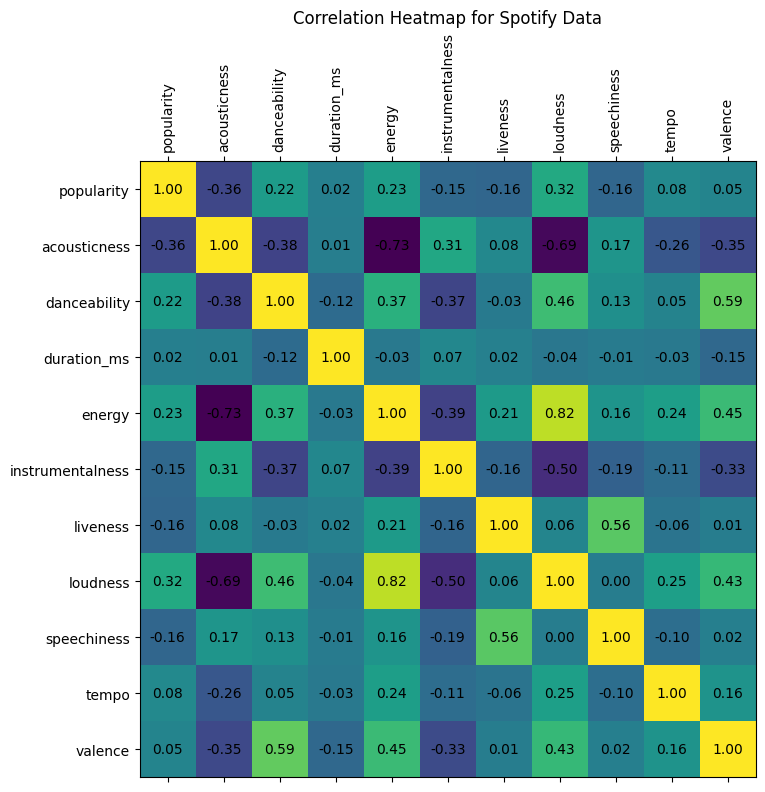

In [65]:
corr = df_numeric.corr()

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap for Spotify Data")

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = corr.iloc[i, j]
        if not None:
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')
plt.show()

We can see correlations with the whole dataset here, but for simplicity let's pare the chart down to just the popularity correlations:

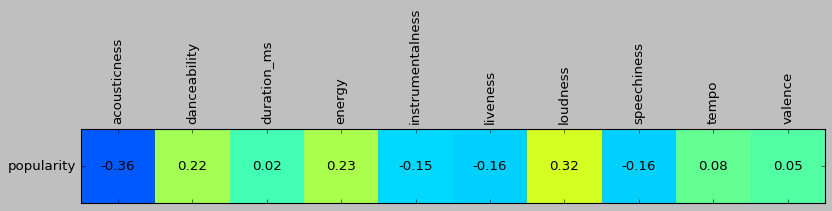

In [96]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.matshow(corr)
ax.set_xlim(0.5, len(corr.columns)-0.5)
ax.set_ylim(-0.5, 0.5)
plt.style.use('seaborn-v0_8-colorblind') #more legible colors
plt.xticks(range(1, len(corr.columns)), corr.columns[1:], rotation=90)
plt.yticks(range(0, 1), corr.columns[:1])

for i in range(0, 1):
    for j in range(1, len(corr.columns)):
        value = corr.iloc[i, j]
        if not None:
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')
plt.show()

Highly popular music tends to be loud, energetic, and danceable, but not very acoustic. Live, speechy, and instrumental tracks also tend to not do as well. None of these correlations are incredibly strong, but perhaps our model will pick up on them anyway.